# Neural Network Force Fields

A lot of what we do in our group involves the use of what are called "neural network forcefields." These are basically energy and force calculators that are just neural networks that have been trained against some data (be it quantum mechanical/classical/semi-empircal/ect...) It is trained to recreate the potential energy surface

This is little strange, but it will make sense in a second.

In [53]:
from ase.build import molecule
from ase.calculators.emt import EMT
import numpy as np

atoms = molecule('CO')
atoms.set_calculator(EMT())

distances = np.arange(-0.5,3,0.1)
potential_energies = []


for distance in distances:
    atoms[0].position = [0,0,distance]
    PE = atoms.get_potential_energy()
    potential_energies.append(PE)

Exception ignored in: <function Data.__del__ at 0x7f961392cd08>
Traceback (most recent call last):
  File "/home/medford/anaconda3/lib/python3.7/site-packages/amp/utilities.py", line 498, in __del__
    self.close()
  File "/home/medford/anaconda3/lib/python3.7/site-packages/amp/utilities.py", line 487, in close
    if self.d:
  File "/home/medford/anaconda3/lib/python3.7/site-packages/amp/utilities.py", line 313, in __len__
    return len(self.keys())
  File "/home/medford/anaconda3/lib/python3.7/site-packages/amp/utilities.py", line 299, in keys
    keys = os.listdir(self.loosepath)
FileNotFoundError: [Errno 2] No such file or directory: 'amp-fingerprint-primes.ampdb/loose'


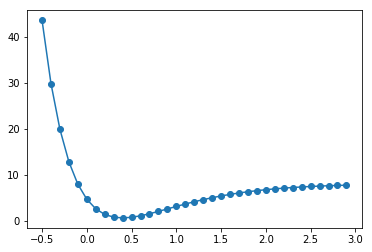

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(distances, potential_energies,'-o')

the chemists and chemical engineers among you may recognize this...

Now let's train a forcefield to replicate this. The code block below is just repeating what we did previously, but saving the images in a list to use as training data.

In [55]:
from ase.io.trajectory import TrajectoryWriter

list_of_atoms = []
tr = TrajectoryWriter('CO.traj')

for distance in distances:
    atoms = molecule('CO')
    atoms.set_calculator(EMT())
    atoms[0].position = [0,0,distance]
    atoms.get_potential_energy()
    atoms.get_forces()
    #tr.write(atoms)
    list_of_atoms.append(atoms)


Now let's train a neural net

In [56]:
from amp import Amp
from amp.descriptor.gaussian import Gaussian
from amp.model.neuralnetwork import NeuralNetwork
from ase.io import read


calc = Amp(descriptor=Gaussian(), model = NeuralNetwork(),
           label='calc')
calc.train(images=list_of_atoms)

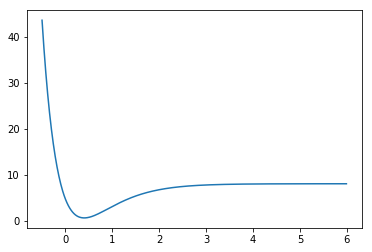

In [57]:
calc = Amp.load('calc.amp')
atoms = molecule('CO')
atoms.set_calculator(calc)

distances = np.arange(-0.5,6,0.01)
NN_potential_energies = []


for distance in distances:
    atoms[0].position = [0,0,distance]
    PE = atoms.get_potential_energy()
    NN_potential_energies.append(PE)

plt.plot(distances, NN_potential_energies,'-')

Seems pretty simple, the neural network is really just learning a 1d function let's do something more complicated.